# Example of match data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
PLAYER_SID = 1572500566 # MDZ_Jimmy

file_name = f"player_{PLAYER_SID}_sf6_matches.xlsx"

In [3]:
df = pd.read_excel(file_name)
print(f"{len(df)} matches")
df.head(n=5)

100 matches


,main_player_name,main_player_sid,main_player_character,main_player_score,main_player_league_rank,main_player_lp,main_player_mr,main_player_mr_ranking,main_player_input_type,main_player_platform,opposite_player_name,opposite_player_sid,opposite_player_character,opposite_player_score,opposite_player_league_rank,opposite_player_lp,opposite_player_mr,opposite_player_mr_ranking,opposite_player_input_type,opposite_player_platform,match_won,left_side,uploaded_at,replay_id,replay_battle_type_name
0,MDZ_jimmY,1572500566,Ryu,2,36,378123,1736,3508,0,Steam,dodidor,1041718095,Mai,0,36,49293,1705,3508,0,Steam,1,1,2025-02-16 18:39:35,SDBXU4QT5,Ranked Match
1,MDZ_jimmY,1572500566,Ryu,0,36,378163,1744,3210,0,Steam,Yamcher,2583439323,Manon,2,36,387278,1750,3210,0,Steam,0,0,2025-02-16 18:37:06,SBRHXFD5N,Ranked Match
2,MDZ_jimmY,1572500566,Ryu,1,36,378203,1752,2902,0,Steam,Yamcher,2583439323,Manon,2,36,387228,1742,2902,0,Steam,0,0,2025-02-16 18:35:28,7GV7MC7AE,Ranked Match
3,MDZ_jimmY,1572500566,Ryu,0,36,378243,1758,2665,0,Steam,bruhnte_,1750187910,A.K.I.,2,36,450141,1850,2665,0,Steam,0,0,2025-02-16 18:32:25,K6STWC3QV,Ranked Match
4,MDZ_jimmY,1572500566,Ryu,1,36,378283,1764,2479,0,Steam,bruhnte_,1750187910,A.K.I.,2,36,450091,1844,2479,0,Steam,0,0,2025-02-16 18:30:55,JGN7M35WV,Ranked Match


### Match repartitions

In [4]:
df["left_side"] = df["left_side"].map({0: "Right side", 1: "Left Side"})

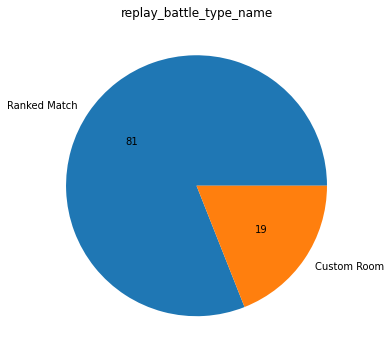

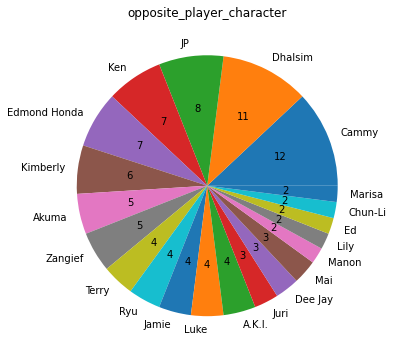

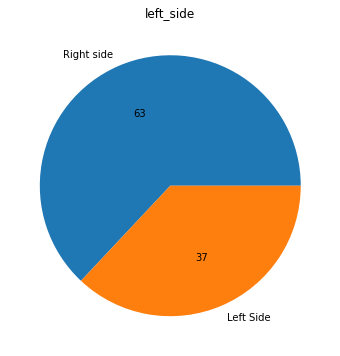

In [5]:
for col in ["replay_battle_type_name", "opposite_player_character", "left_side"]:
    plt.figure()
    df[col].value_counts().plot.pie(
        autopct=lambda x: round(x / 100 * len(df)),
        figsize=(8, 6)
    )
    plt.title(col)
    plt.ylabel(None)

### Average of match won

In [6]:
df["match_won"].mean()

0.53

### Average of match won depending of player side

In [7]:
df[["left_side", "match_won"]].groupby("left_side").mean()

,match_won
left_side,
Left Side,0.567568
Right side,0.507937


### Average of match won depending of opposite character

In [8]:
df[["opposite_player_character", "match_won"]].groupby("opposite_player_character").mean()

,match_won
opposite_player_character,
A.K.I.,0.000000
Akuma,0.600000
Cammy,0.500000
Chun-Li,1.000000
Dee Jay,0.333333
Dhalsim,0.454545
Ed,0.000000
Edmond Honda,0.571429
JP,0.375000


### Highest ratings

In [9]:
print("Highest MR", df['main_player_mr'].max())
print("Highest World Ranking", df['main_player_mr_ranking'].min())

highest_winstreak = max(len(seq) for seq in "".join(df["match_won"].map(str)).split("0"))

print("Highest winstreak (assuming no gap in match saved):", highest_winstreak)

Highest MR 1764
Highest World Ranking 2297
Highest winstreak (assuming no gap in match saved): 8


### Plot ranked match MR evolution

Text(0.5, 1.0, 'Ranked matches MR Evolution')

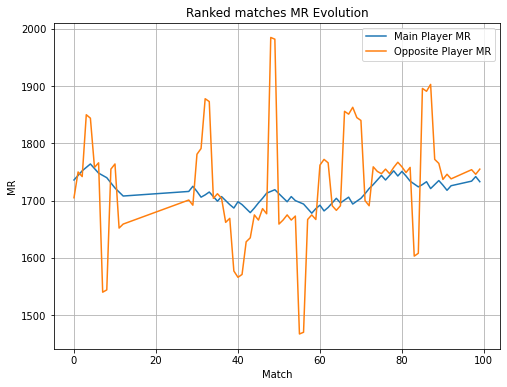

In [10]:
df_ranked = df[df["replay_battle_type_name"] == "Ranked Match"]

plt.figure(figsize=(8, 6))

plt.plot(df_ranked["main_player_mr"], label="Main Player MR")
plt.plot(df_ranked["opposite_player_mr"], label="Opposite Player MR")

plt.grid(True)
plt.legend()
plt.xlabel("Match")
plt.ylabel("MR")
plt.title("Ranked matches MR Evolution")